## EIA Monthly Electric Grid Data - Generation Operations
## Exploratory Data Analysis

https://www.eia.gov/electricity/gridmonitor/about

In [1]:
import pandas as pd
import numpy as np

# genops.csv was retrieved from the U.S. Energy Information Administration API using code 
# in EIA_GetData3.ipynb
csv_path = 'genops.csv'

genops = pd.read_csv(csv_path, low_memory=False)
genops.shape


(5187827, 22)

In [2]:
genops = genops.drop_duplicates()
genops.shape

(5187827, 22)

In [3]:
genops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5187827 entries, 0 to 5187826
Data columns (total 22 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   period                        object
 1   plantCode                     object
 2   plantName                     object
 3   fuel2002                      object
 4   fuelTypeDescription           object
 5   state                         object
 6   stateDescription              object
 7   primeMover                    object
 8   average-heat-content          object
 9   average-heat-content-units    object
 10  consumption-for-eg            object
 11  consumption-for-eg-units      object
 12  consumption-for-eg-btu        object
 13  generation                    object
 14  gross-generation              object
 15  total-consumption             object
 16  total-consumption-units       object
 17  total-consumption-btu         object
 18  consumption-for-eg-btu-units  object
 19  

In [4]:
genops.head()

,period,plantCode,plantName,fuel2002,fuelTypeDescription,state,stateDescription,primeMover,average-heat-content,average-heat-content-units,...,consumption-for-eg-btu,generation,gross-generation,total-consumption,total-consumption-units,total-consumption-btu,consumption-for-eg-btu-units,generation-units,gross-generation-units,total-consumption-btu-units
0,2022-12,3,Barry,SUB,Coal,AL,Alabama,ST,0.0,MMBtu per short tons,...,0,0.0,0.0,0.0,MMBtu per short tons,0,MMBtu,megawatthours,megawatthours,MMBtu
1,2022-12,8223,Springerville,SUN,Solar,AZ,Arizona,ALL,0.0,NaN,...,8527,964.26,974.0,0.0,NaN,8527,MMBtu,megawatthours,megawatthours,MMBtu
2,2022-12,8223,Springerville,SUB,Coal,AZ,Arizona,ALL,18.053,MMBtu per short tons,...,8380726,741778.54,880021.41,464229.0,MMBtu per short tons,8380726,MMBtu,megawatthours,megawatthours,MMBtu
3,2022-12,50955,Rousselot Inc,NG,Natural Gas,MA,Massachusetts,ALL,1.03,MMBtu per Mcf,...,6491,1485.0,1560.0,67871.0,MMBtu per Mcf,69907,MMBtu,megawatthours,megawatthours,MMBtu
4,2022-12,50955,Rousselot Inc,ALL,Total,MA,Massachusetts,ALL,NaN,NaN,...,6491,1485.0,1560.0,NaN,NaN,69907,MMBtu,megawatthours,megawatthours,MMBtu


In [5]:
genops.columns = genops.columns.str.replace('-', '_')
genops['period'] = pd.to_datetime(genops['period'], yearfirst=True, errors='coerce')
numeric_cols = ['consumption_for_eg_btu', 'generation']
genops[numeric_cols] = genops[numeric_cols].apply(pd.to_numeric, errors='coerce')
genops['plantCode'] = 'P' + genops['plantCode'].astype(str)


In [6]:
genops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5187827 entries, 0 to 5187826
Data columns (total 22 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   period                        datetime64[ns]
 1   plantCode                     object        
 2   plantName                     object        
 3   fuel2002                      object        
 4   fuelTypeDescription           object        
 5   state                         object        
 6   stateDescription              object        
 7   primeMover                    object        
 8   average_heat_content          object        
 9   average_heat_content_units    object        
 10  consumption_for_eg            object        
 11  consumption_for_eg_units      object        
 12  consumption_for_eg_btu        float64       
 13  generation                    float64       
 14  gross_generation              object        
 15  total_consumption             ob

In [7]:
genops = genops.sort_values(by = 'period')

In [8]:
genops.head()

,period,plantCode,plantName,fuel2002,fuelTypeDescription,state,stateDescription,primeMover,average_heat_content,average_heat_content_units,...,consumption_for_eg_btu,generation,gross_generation,total_consumption,total_consumption_units,total_consumption_btu,consumption_for_eg_btu_units,generation_units,gross_generation_units,total_consumption_btu_units
3760493,2008-01-01,P2573,Heuvelton,ALL,Total,NY,New York,ALL,NaN,NaN,...,4302.0,436.58,440.53,NaN,NaN,4302.0,MMBtu,megawatthours,megawatthours,MMBtu
3754156,2008-01-01,P56392,FPL Energy Oliver Wind I LLC,ALL,Total,ND,North Dakota,ALL,NaN,NaN,...,62609.0,6353.65,6353.65,NaN,NaN,62609.0,MMBtu,megawatthours,megawatthours,MMBtu
3754157,2008-01-01,P56392,FPL Energy Oliver Wind I LLC,WND,Wind,ND,North Dakota,ALL,0.0,NaN,...,62609.0,6353.65,6353.65,0.0,NaN,62609.0,MMBtu,megawatthours,megawatthours,MMBtu
3754158,2008-01-01,P56392,FPL Energy Oliver Wind I LLC,WND,Wind,ND,North Dakota,WT,0.0,NaN,...,62609.0,6353.65,6353.65,0.0,NaN,62609.0,MMBtu,megawatthours,megawatthours,MMBtu
3754159,2008-01-01,P56394,Forest Creek Wind Farm LLC,ALL,Total,TX,Texas,ALL,NaN,NaN,...,368239.0,37369.53,37747.0,NaN,NaN,368239.0,MMBtu,megawatthours,megawatthours,MMBtu


In [9]:
genops.tail()

,period,plantCode,plantName,fuel2002,fuelTypeDescription,state,stateDescription,primeMover,average_heat_content,average_heat_content_units,...,consumption_for_eg_btu,generation,gross_generation,total_consumption,total_consumption_units,total_consumption_btu,consumption_for_eg_btu_units,generation_units,gross_generation_units,total_consumption_btu_units
2814600,2023-01-01,P447,Parker Dam,WAT,Hydroelectric Conventional,CA,California,ALL,0.0,NaN,...,151931.0,17179.0,17312.0,0.0,NaN,151931,MMBtu,megawatthours,megawatthours,MMBtu
2814601,2023-01-01,P399,Harbor,ALL,Total,CA,California,ALL,NaN,NaN,...,287252.0,29893.0,31510.0,NaN,NaN,287252,MMBtu,megawatthours,megawatthours,MMBtu
2814579,2023-01-01,P438,Thermalito,WAT,Hydroelectric Conventional,CA,California,HY,0.0,NaN,...,1866.0,211.0,413.0,0.0,NaN,1866,MMBtu,megawatthours,megawatthours,MMBtu
2822894,2023-01-01,P55062,Tenaska Frontier Generation Station,NG,Natural Gas,TX,Texas,ALL,1.011,MMBtu per Mcf,...,2415625.0,330782.0,337809.0,2389342.0,MMBtu per Mcf,2415625,MMBtu,megawatthours,megawatthours,MMBtu
2214645,NaT,PplantCode,plantName,fuel2002,fuelTypeDescription,state,stateDescription,primeMover,average-heat-content,average-heat-content-units,...,NaN,NaN,gross-generation,total-consumption,total-consumption-units,total-consumption-btu,consumption-for-eg-btu-units,generation-units,gross-generation-units,total-consumption-btu-units


In [10]:
genops[genops.plantCode == 'P59157']

,period,plantCode,plantName,fuel2002,fuelTypeDescription,state,stateDescription,primeMover,average_heat_content,average_heat_content_units,...,consumption_for_eg_btu,generation,gross_generation,total_consumption,total_consumption_units,total_consumption_btu,consumption_for_eg_btu_units,generation_units,gross_generation_units,total_consumption_btu_units
5185501,2014-12-01,P59157,Pecan PV1,SUN,Solar,NC,North Carolina,ALL,0.0,NaN,...,0.0,0.00,0.0,0.0,NaN,0,MMBtu,megawatthours,megawatthours,MMBtu
5185500,2014-12-01,P59157,Pecan PV1,ALL,Total,NC,North Carolina,ALL,NaN,NaN,...,0.0,0.00,0.0,NaN,NaN,0,MMBtu,megawatthours,megawatthours,MMBtu
5185502,2014-12-01,P59157,Pecan PV1,SUN,Solar,NC,North Carolina,PV,0.0,NaN,...,0.0,0.00,0.0,0.0,NaN,0,MMBtu,megawatthours,megawatthours,MMBtu
2843808,2015-01-01,P59157,Pecan PV1,SUN,Solar,NC,North Carolina,PV,0.0,NaN,...,4773.0,512.20,515.09,0.0,NaN,4773,MMBtu,megawatthours,megawatthours,MMBtu
2843806,2015-01-01,P59157,Pecan PV1,ALL,Total,NC,North Carolina,ALL,NaN,NaN,...,4773.0,512.20,515.09,NaN,NaN,4773,MMBtu,megawatthours,megawatthours,MMBtu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662963,2021-11-01,P59157,Pecan PV1,SUN,Solar,NC,North Carolina,ALL,0.0,NaN,...,5976.0,675.75,675.75,0.0,NaN,5976,MMBtu,megawatthours,megawatthours,MMBtu
2662964,2021-11-01,P59157,Pecan PV1,SUN,Solar,NC,North Carolina,PV,0.0,NaN,...,5976.0,675.75,675.75,0.0,NaN,5976,MMBtu,megawatthours,megawatthours,MMBtu
2687729,2021-12-01,P59157,Pecan PV1,ALL,Total,NC,North Carolina,ALL,NaN,NaN,...,4366.0,493.66,493.66,NaN,NaN,4366,MMBtu,megawatthours,megawatthours,MMBtu
2687730,2021-12-01,P59157,Pecan PV1,SUN,Solar,NC,North Carolina,ALL,0.0,NaN,...,4366.0,493.66,493.66,0.0,NaN,4366,MMBtu,megawatthours,megawatthours,MMBtu


In [11]:
genops.describe(include=['O']).T

,count,unique,top,freq
plantCode,5187827,12480,P99999,8073
plantName,5187487,13270,State-Fuel Level Increment,8073
fuel2002,5187827,44,ALL,1290795
fuelTypeDescription,5187827,20,Total,1290795
state,5179414,53,CA,645967
stateDescription,5175721,52,California,645967
primeMover,5187827,20,ALL,3131433
average_heat_content,3897032,20874,0.0,2127239
average_heat_content_units,2453450,5,MMBtu per Mcf,1137871
consumption_for_eg,3896986,296686,0.0,2111666


In [12]:
genops.describe().T

,count,mean,min,25%,50%,75%,max,std
period,5187826,2015-11-09 22:08:13.000034304,2008-01-01 00:00:00,2012-06-01 00:00:00,2016-04-01 00:00:00,2019-07-01 00:00:00,2023-01-01 00:00:00,NaN
consumption_for_eg_btu,5187826.0,337916.724388,-6.0,180.0,6808.0,73558.0,459650976.0,1638517.125061
generation,5187826.0,35729.816876,-235969.0,14.87,757.13,8314.0,52252809.22,168217.242982


In [13]:
genops.fuelTypeDescription.unique()

array(['Total', 'Wind', 'Natural Gas', 'Distillate Fuel Oil',
       'Hydroelectric Conventional', 'Coal', 'Residual Fuel Oil',
       'Municiapl Landfill Gas', 'Other', 'Wood Waste Solids',
       'other renewables', 'Solar', 'Other Gases', 'Petroleum Coke',
       'Waste Oil and Other Oils', 'Nuclear', 'Waste Coal',
       'Hydroelectric Pumped Storage', 'Geothermal',
       'fuelTypeDescription'], dtype=object)

In [14]:
genops.fuel2002.unique()

array(['ALL', 'WND', 'NG', 'DFO', 'WAT', 'BIT', 'RFO', 'LFG', 'MSB',
       'MSN', 'WDS', 'AB', 'SUN', 'WH', 'OG', 'PC', 'SUB', 'OBG', 'OTH',
       'KER', 'TDF', 'JF', 'NUC', 'WO', 'OBS', 'LIG', 'SC', 'WC', 'SLW',
       'OBL', 'GEO', 'BLQ', 'BFG', 'PG', 'PUR', 'WDL', 'MWH', 'SGP', 'RC',
       'ANT', 'SGC', 'MSW', 'H2', 'fuel2002'], dtype=object)

<Axes: xlabel='period'>

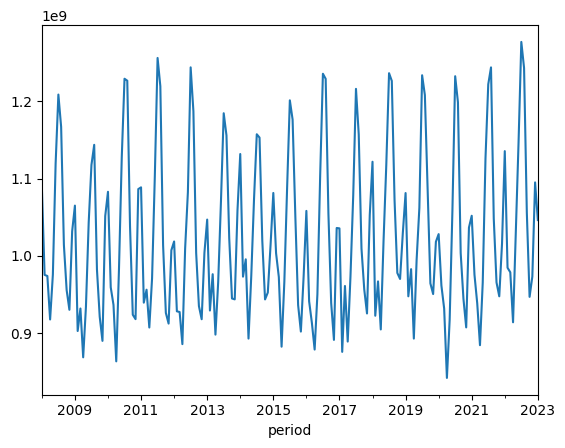

In [15]:
genops.groupby('period')['generation'].sum().plot(x='period',y='generation')

<Axes: xlabel='period'>

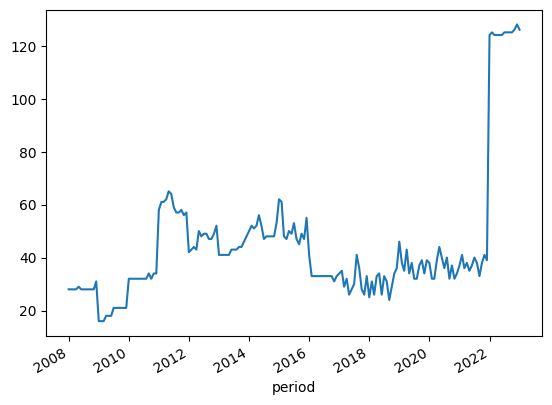

In [16]:
genops[genops.plantCode == 'P99999']['period'].value_counts().plot()

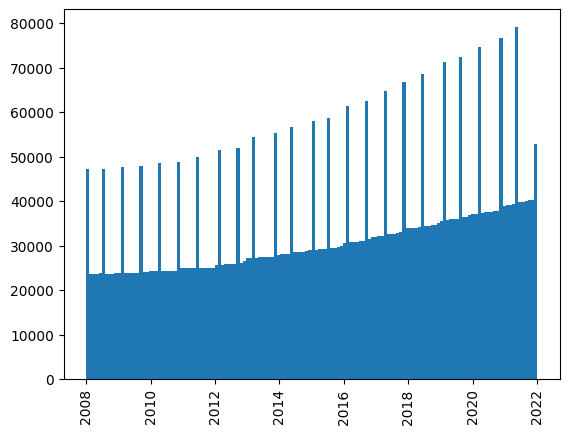

In [17]:
import matplotlib.pyplot as plt
p = plt.hist(genops[(genops.period > '2000-01-01') & (genops.period <= '2022-01-01')]['period'], bins=144)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='period'>

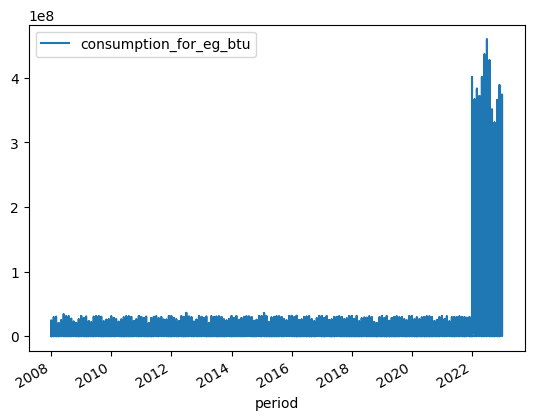

In [18]:
genops.plot(x='period', y='consumption_for_eg_btu')

<Axes: >

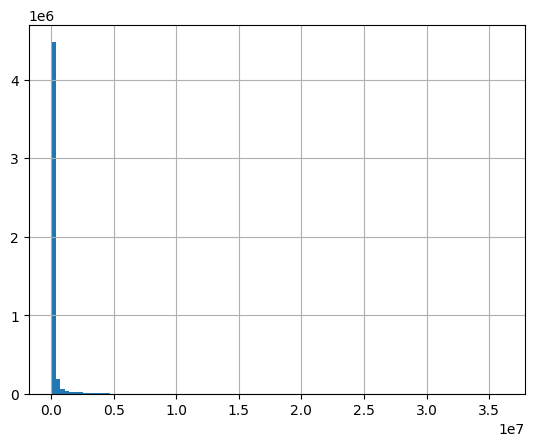

In [19]:
genops[genops.period < '2022-01-01']['consumption_for_eg_btu'].hist(bins=100)

In [20]:
#group by BA using gencap data
import json
plant_ba_dict_fname = 'plant_ba_dict.json'
with open(plant_ba_dict_fname, "r") as infile:
    plant_ba_dict = json.load(infile)
print(plant_ba_dict)

{'P50663': 'PJM', 'P59157': 'CPLE', 'P59518': 'PJM', 'P59517': 'PJM', 'P59516': 'PJM', 'P59515': 'PJM', 'P59156': 'CPLE', 'P64655': 'WACM', 'P64654': 'WACM', 'P64653': 'WACM', 'P64652': 'WACM', 'P64651': 'WACM', 'P64650': 'WACM', 'P64649': 'WACM', 'P64648': 'WACM', 'P64647': 'PJM', 'P64646': 'PJM', 'P64645': 'PJM', 'P64644': 'PJM', 'P64643': 'PJM', 'P64642': 'PJM', 'P64608': 'PJM', 'P64606': 'PJM', 'P64605': 'ISNE', 'P63646': 'NYIS', 'P63645': 'PJM', 'P58102': 'CISO', 'P58101': 'CISO', 'P58096': 'PJM', 'P58095': 'PJM', 'P58094': 'PJM', 'P58093': 'PJM', 'P58085': 'CISO', 'P58091': 'PJM', 'P58084': 'ISNE', 'P58080': 'ERCO', 'P58079': 'PJM', 'P65580': 'ERCO', 'P61652': 'MISO', 'P56544': 'MISO', 'P61028': 'PJM', 'P50624': 'CISO', 'P59312': 'SWPP', 'P59311': 'SWPP', 'P64483': 'MISO', 'P64482': 'MISO', 'P64479': 'MISO', 'P64154': 'MISO', 'P64153': 'MISO', 'P63987': 'MISO', 'P63726': 'MISO', 'P63725': 'MISO', 'P63724': 'MISO', 'P63249': 'MISO', 'P63247': 'MISO', 'P63010': 'MISO', 'P63009': 'M

In [21]:
genops['ba_code'] = genops['plantCode'].map(plant_ba_dict)
genops.head()

,period,plantCode,plantName,fuel2002,fuelTypeDescription,state,stateDescription,primeMover,average_heat_content,average_heat_content_units,...,generation,gross_generation,total_consumption,total_consumption_units,total_consumption_btu,consumption_for_eg_btu_units,generation_units,gross_generation_units,total_consumption_btu_units,ba_code
3760493,2008-01-01,P2573,Heuvelton,ALL,Total,NY,New York,ALL,NaN,NaN,...,436.58,440.53,NaN,NaN,4302.0,MMBtu,megawatthours,megawatthours,MMBtu,NYIS
3754156,2008-01-01,P56392,FPL Energy Oliver Wind I LLC,ALL,Total,ND,North Dakota,ALL,NaN,NaN,...,6353.65,6353.65,NaN,NaN,62609.0,MMBtu,megawatthours,megawatthours,MMBtu,MISO
3754157,2008-01-01,P56392,FPL Energy Oliver Wind I LLC,WND,Wind,ND,North Dakota,ALL,0.0,NaN,...,6353.65,6353.65,0.0,NaN,62609.0,MMBtu,megawatthours,megawatthours,MMBtu,MISO
3754158,2008-01-01,P56392,FPL Energy Oliver Wind I LLC,WND,Wind,ND,North Dakota,WT,0.0,NaN,...,6353.65,6353.65,0.0,NaN,62609.0,MMBtu,megawatthours,megawatthours,MMBtu,MISO
3754159,2008-01-01,P56394,Forest Creek Wind Farm LLC,ALL,Total,TX,Texas,ALL,NaN,NaN,...,37369.53,37747.0,NaN,NaN,368239.0,MMBtu,megawatthours,megawatthours,MMBtu,ERCO


In [22]:
genops.isna().sum()

period                                1
plantCode                             0
plantName                           340
fuel2002                              0
fuelTypeDescription                   0
state                              8413
stateDescription                  12106
primeMover                            0
average_heat_content            1290795
average_heat_content_units      2734377
consumption_for_eg              1290841
consumption_for_eg_units        2734377
consumption_for_eg_btu                1
generation                            1
gross_generation                      0
total_consumption               1290795
total_consumption_units         2734377
total_consumption_btu                 0
consumption_for_eg_btu_units          0
generation_units                      0
gross_generation_units                0
total_consumption_btu_units           0
ba_code                          208305
dtype: int64

In [23]:
genops[genops.ba_code.isna()]['state'].unique()

array(['HI', 'OR', 'NH', 'IA', 'NY', 'CA', 'AK', 'IL', 'WI', 'GA', 'IN',
       'ND', 'OH', 'NC', 'OK', 'NM', 'KS', 'AZ', 'NV', 'AL', 'NJ', 'MA',
       'MT', nan, 'CO', 'TN', 'CT', 'MI', 'FL', 'NE', 'DC', 'DE', 'SC',
       'RI', 'LA', 'TX', 'MN', 'UT', 'KY', 'MS', 'WY', 'VA', 'MO', 'PA',
       'MD', 'WA', 'WV', 'ME', 'PR', 'ID', 'state'], dtype=object)

In [24]:
genops.head().T

,3760493,3754156,3754157,3754158,3754159
period,2008-01-01 00:00:00,2008-01-01 00:00:00,2008-01-01 00:00:00,2008-01-01 00:00:00,2008-01-01 00:00:00
plantCode,P2573,P56392,P56392,P56392,P56394
plantName,Heuvelton,FPL Energy Oliver Wind I LLC,FPL Energy Oliver Wind I LLC,FPL Energy Oliver Wind I LLC,Forest Creek Wind Farm LLC
fuel2002,ALL,ALL,WND,WND,ALL
fuelTypeDescription,Total,Total,Wind,Wind,Total
state,NY,ND,ND,ND,TX
stateDescription,New York,North Dakota,North Dakota,North Dakota,Texas
primeMover,ALL,ALL,ALL,WT,ALL
average_heat_content,NaN,NaN,0.0,0.0,NaN
average_heat_content_units,NaN,NaN,NaN,NaN,NaN


In [25]:
genops['consumption_for_eg_btu_units'].unique()

array(['MMBtu', 'consumption-for-eg-btu-units'], dtype=object)

In [26]:
genops['generation_units'].unique()

array(['megawatthours', 'generation-units'], dtype=object)

In [27]:
genops.shape

(5187827, 23)

In [28]:
(2148621-2078969)/2148621
# ~3% of genops lines not assigned to BA

0.03241707122847631

In [29]:
genops.dropna(subset='ba_code', inplace=True)

In [30]:
genops.shape

(4979522, 23)

In [31]:
genops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4979522 entries, 3760493 to 2822894
Data columns (total 23 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   period                        datetime64[ns]
 1   plantCode                     object        
 2   plantName                     object        
 3   fuel2002                      object        
 4   fuelTypeDescription           object        
 5   state                         object        
 6   stateDescription              object        
 7   primeMover                    object        
 8   average_heat_content          object        
 9   average_heat_content_units    object        
 10  consumption_for_eg            object        
 11  consumption_for_eg_units      object        
 12  consumption_for_eg_btu        float64       
 13  generation                    float64       
 14  gross_generation              object        
 15  total_consumption             o

In [32]:
genops['generation'].describe()

count    4.979522e+06
mean     3.659049e+04
std      1.497006e+05
min     -2.359690e+05
25%      2.008000e+01
50%      8.096800e+02
75%      8.842377e+03
max      3.793524e+06
Name: generation, dtype: float64

In [33]:
genout = genops[['period', 'ba_code', 'fuel2002', 'consumption_for_eg_btu', 'generation']]
genout = genout.rename(columns={'fuel2002':'energy_src', 'consumption_for_eg_btu': \
                                'consumed_mbtu', 'generation':'gen_mwh'})
genout.head()

,period,ba_code,energy_src,consumed_mbtu,gen_mwh
3760493,2008-01-01,NYIS,ALL,4302.0,436.58
3754156,2008-01-01,MISO,ALL,62609.0,6353.65
3754157,2008-01-01,MISO,WND,62609.0,6353.65
3754158,2008-01-01,MISO,WND,62609.0,6353.65
3754159,2008-01-01,ERCO,ALL,368239.0,37369.53


In [34]:
genout = genout[genout.energy_src != 'ALL'].reset_index(drop=True)
genout.head()

,period,ba_code,energy_src,consumed_mbtu,gen_mwh
0,2008-01-01,MISO,WND,62609.0,6353.65
1,2008-01-01,MISO,WND,62609.0,6353.65
2,2008-01-01,ERCO,WND,368239.0,37369.53
3,2008-01-01,ERCO,WND,368239.0,37369.53
4,2008-01-01,ERCO,WND,524706.0,53248.00


<Axes: xlabel='period'>

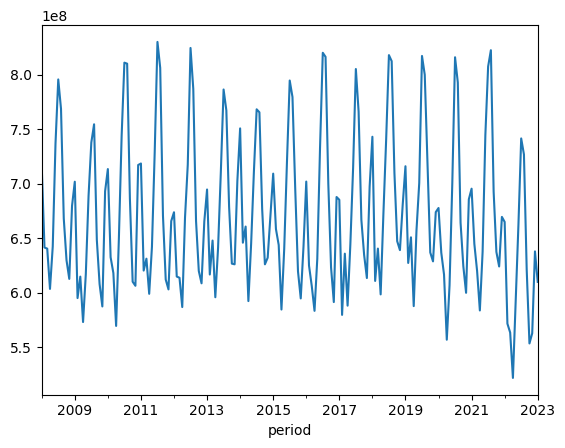

In [35]:
genout.groupby('period')['gen_mwh'].sum().plot(x='period',y='generation')

In [36]:
genout[genout.energy_src == 'SUN'].describe()

,period,consumed_mbtu,gen_mwh
count,500517,5.005170e+05,500517.000000
mean,2018-10-05 22:13:30.414830848,2.112898e+04,2350.802751
min,2008-01-01 00:00:00,0.000000e+00,-121.000000
25%,2017-03-01 00:00:00,1.663000e+03,183.990000
50%,2019-05-01 00:00:00,3.517000e+03,389.860000
75%,2020-11-01 00:00:00,8.742000e+03,970.320000
max,2023-01-01 00:00:00,1.274145e+06,138014.000000
std,NaN,6.585637e+04,7325.886462


In [37]:
# wtf does EIA really track amount of 'SUN' fuel consumed?

In [38]:
genout.head()

,period,ba_code,energy_src,consumed_mbtu,gen_mwh
0,2008-01-01,MISO,WND,62609.0,6353.65
1,2008-01-01,MISO,WND,62609.0,6353.65
2,2008-01-01,ERCO,WND,368239.0,37369.53
3,2008-01-01,ERCO,WND,368239.0,37369.53
4,2008-01-01,ERCO,WND,524706.0,53248.00


In [39]:
esrc_co2_dict_fname = 'esrc_co2_dict.json'
with open(esrc_co2_dict_fname, "r") as infile:
    esrc_co2_dict = json.load(infile)
e_co2 = {}
for k, v in esrc_co2_dict.items():
    e_co2[k] = v['kg_co2_per_million_btu']
#print(e_co2)
genout['co2_kton'] = genout['consumed_mbtu']*genout['energy_src'].map(e_co2)/1e6

In [40]:
genout.head(10)

,period,ba_code,energy_src,consumed_mbtu,gen_mwh,co2_kton
0,2008-01-01,MISO,WND,62609.0,6353.65,0.000000
1,2008-01-01,MISO,WND,62609.0,6353.65,0.000000
2,2008-01-01,ERCO,WND,368239.0,37369.53,0.000000
3,2008-01-01,ERCO,WND,368239.0,37369.53,0.000000
4,2008-01-01,ERCO,WND,524706.0,53248.00,0.000000
5,2008-01-01,ERCO,WND,524706.0,53248.00,0.000000
6,2008-01-01,PJM,NG,9015.0,822.69,0.476984
7,2008-01-01,PJM,NG,9015.0,822.69,0.476984
8,2008-01-01,WFEC,DFO,0.0,0.00,0.000000
9,2008-01-01,WFEC,NG,1077450.0,114755.00,57.007880


In [41]:
import json

BA_dict_fname = 'BA_dict.json'
with open(BA_dict_fname, "r") as infile:
    BA_dict = json.load(infile)
print(BA_dict)

{'YAD': {'BA_Name': 'Alcoa Power Generating, Inc. - Yadkin Division', 'Time_Zone': 'Eastern', 'Region_Country_Code': 'CAR', 'Region_Country_Name': 'Carolinas', 'Generation_Only_BA': 'Yes', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'AZPS': {'BA_Name': 'Arizona Public Service Company', 'Time_Zone': 'Arizona', 'Region_Country_Code': 'SW', 'Region_Country_Name': 'Southwest', 'Generation_Only_BA': 'No', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'DEAA': {'BA_Name': 'Arlington Valley, LLC', 'Time_Zone': 'Arizona', 'Region_Country_Code': 'SW', 'Region_Country_Name': 'Southwest', 'Generation_Only_BA': 'Yes', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'AECI': {'BA_Name': 'Associated Electric Cooperative, Inc.', 'Time_Zone': 'Central', 'Region_Country_Code': 'MIDW', 'Region_Country_

In [42]:
#remove non-US BAs, and larger regions
genout = genout[genout.ba_code.isin(BA_dict.keys())]
genout.shape

(3503499, 6)

In [43]:
genout = genout.groupby(['period', 'ba_code'], as_index = False)[['gen_mwh','co2_kton']] \
    .aggregate('sum')
genout.head()

,period,ba_code,gen_mwh,co2_kton
0,2008-01-01,AEC,956757.90,798.625086
1,2008-01-01,AECI,3538481.16,2810.807112
2,2008-01-01,AVA,1171593.70,139.373992
3,2008-01-01,AZPS,4535011.56,4078.848443
4,2008-01-01,BANC,1456123.84,557.080674


In [44]:
conditions = [(genout.gen_mwh <= 0), (genout.gen_mwh > 0)]
results = [float('nan'), (genout['co2_kton']/genout['gen_mwh'])*1e6]
genout['kg_co2_per_mwh'] = np.select(conditions, results)
genout.head()

,period,ba_code,gen_mwh,co2_kton,kg_co2_per_mwh
0,2008-01-01,AEC,956757.90,798.625086,834.720138
1,2008-01-01,AECI,3538481.16,2810.807112,794.354127
2,2008-01-01,AVA,1171593.70,139.373992,118.961029
3,2008-01-01,AZPS,4535011.56,4078.848443,899.413020
4,2008-01-01,BANC,1456123.84,557.080674,382.577813


<function matplotlib.pyplot.show(close=None, block=None)>

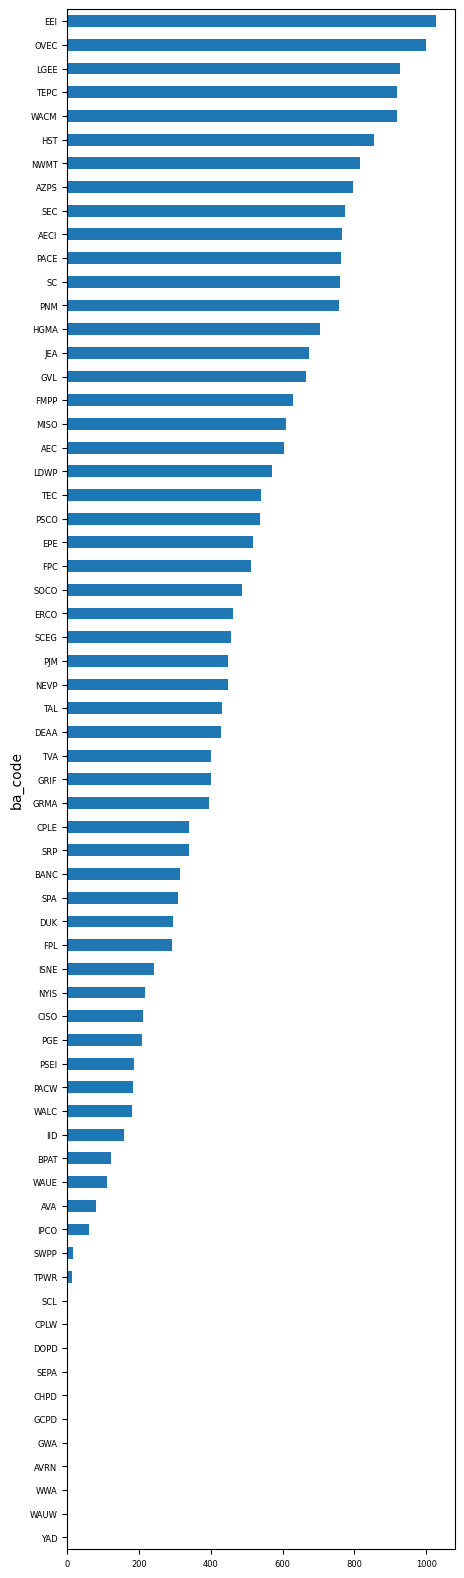

In [45]:
import matplotlib.pyplot as plt
#genout.groupby('ba_code')[['period','kg_co2_per_mwh']].plot(x='period',y='kg_co2_per_mwh')
plt.figure(1, [5,20])
ax = genout[genout.ba_code != 'NSB'].groupby('ba_code')['kg_co2_per_mwh'].mean().sort_values().plot.barh()

plt.tick_params(labelsize=6)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

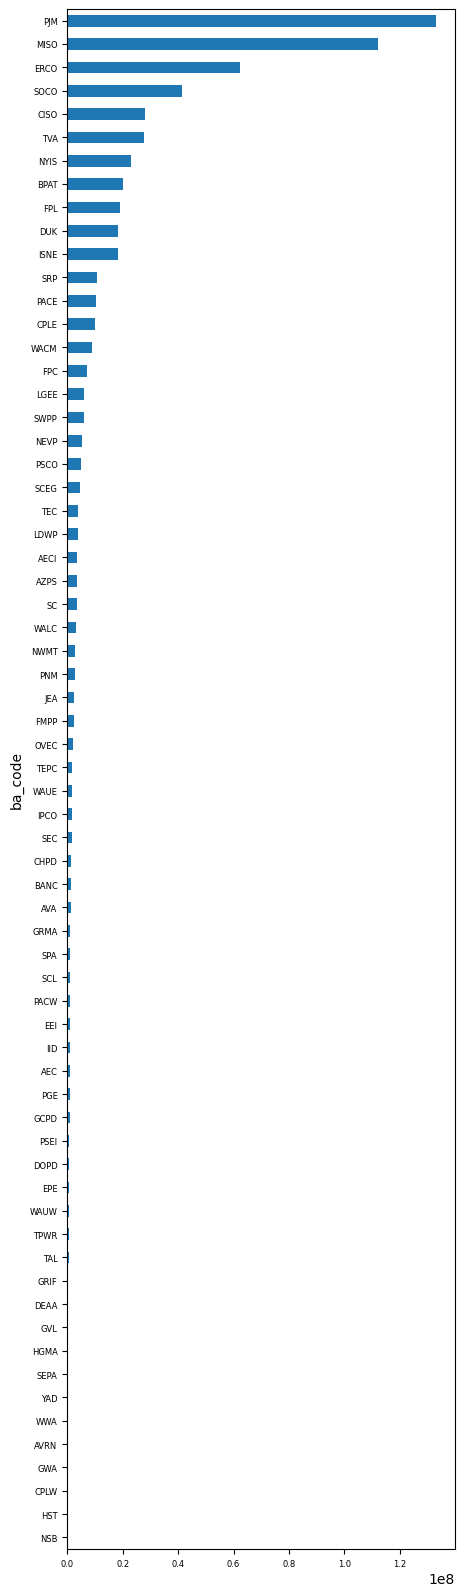

In [46]:
plt.figure(1, [5,20])
ax = genout.groupby('ba_code')['gen_mwh'].mean().sort_values().plot.barh()

plt.tick_params(labelsize=6)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

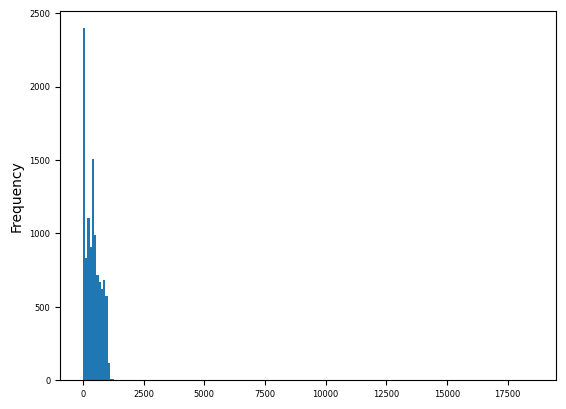

In [47]:
plt.figure()
ax = genout[genout.ba_code != 'NSB']['kg_co2_per_mwh'].plot.hist(bins=200)

plt.tick_params(labelsize=6)
plt.show

[Text(0, 0.5, 'kg CO2 per MWh')]

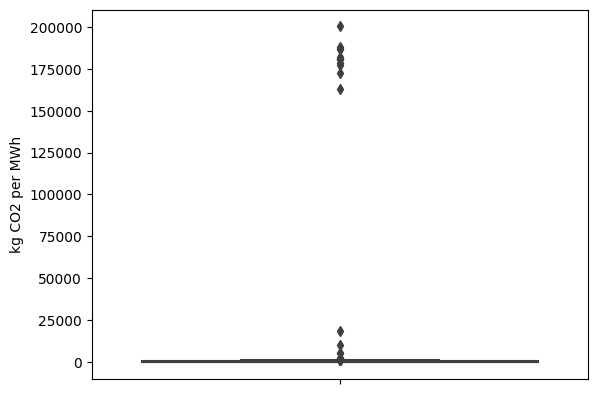

In [48]:
import seaborn as sns
sns.boxplot(data=genout, 
             y='kg_co2_per_mwh').set(ylabel='kg CO2 per MWh')

In [49]:
co2_99_5 = genout['kg_co2_per_mwh'].quantile(q=0.995)
print(f"99.5th percentile CO2 intensity:  {co2_99_5}")
print(f"observations > {co2_99_5}:  {genout[genout.kg_co2_per_mwh > co2_99_5]['kg_co2_per_mwh'].count()}")

99.5th percentile CO2 intensity:  1317.4327623456015
observations > 1317.4327623456015:  57


In [50]:
worstCI = 1560
genout[genout.kg_co2_per_mwh > worstCI]['kg_co2_per_mwh'].count()

41

In [51]:
#genout = genout[genout.kg_co2_per_mwh <= worstCI]
genout = genout[genout.kg_co2_per_mwh <= co2_99_5]

[Text(0, 0.5, 'kg CO2 per MWh')]

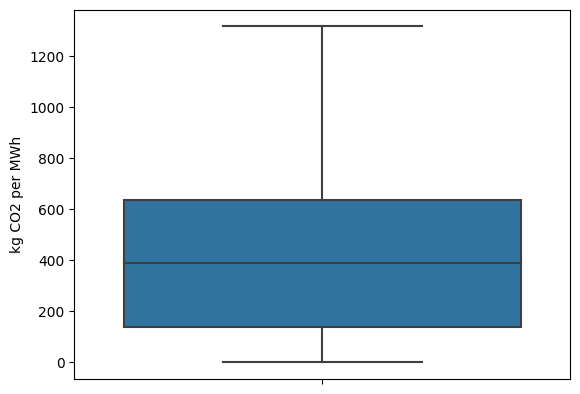

In [52]:
sns.boxplot(data=genout, 
             y='kg_co2_per_mwh').set(ylabel='kg CO2 per MWh')

<Axes: >

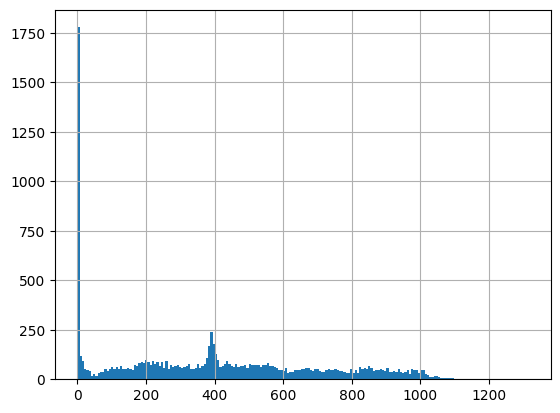

In [53]:
genout[genout.ba_code != 'NSB']['kg_co2_per_mwh'].hist(bins=200)


<Axes: >

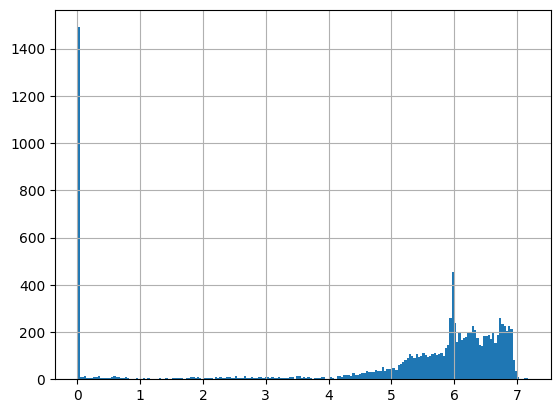

In [54]:
np.log(1+genout['kg_co2_per_mwh']).hist(bins=200)


<Axes: >

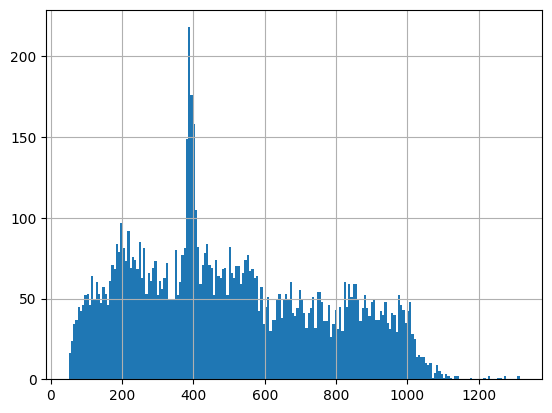

In [55]:
genout[genout.kg_co2_per_mwh > 50]['kg_co2_per_mwh'].hist(bins=200)

In [56]:
import json

BA_dict_fname = 'BA_dict.json'
with open(BA_dict_fname, "r") as infile:
    BA_dict = json.load(infile)
print(BA_dict)

{'YAD': {'BA_Name': 'Alcoa Power Generating, Inc. - Yadkin Division', 'Time_Zone': 'Eastern', 'Region_Country_Code': 'CAR', 'Region_Country_Name': 'Carolinas', 'Generation_Only_BA': 'Yes', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'AZPS': {'BA_Name': 'Arizona Public Service Company', 'Time_Zone': 'Arizona', 'Region_Country_Code': 'SW', 'Region_Country_Name': 'Southwest', 'Generation_Only_BA': 'No', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'DEAA': {'BA_Name': 'Arlington Valley, LLC', 'Time_Zone': 'Arizona', 'Region_Country_Code': 'SW', 'Region_Country_Name': 'Southwest', 'Generation_Only_BA': 'Yes', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'AECI': {'BA_Name': 'Associated Electric Cooperative, Inc.', 'Time_Zone': 'Central', 'Region_Country_Code': 'MIDW', 'Region_Country_

In [57]:
gen_only_bas = [k for k in BA_dict.keys() if BA_dict[k]["Generation_Only_BA"] == "Yes"]

In [58]:
genout_ngo = genout[~genout.ba_code.isin(gen_only_bas)]

<Axes: >

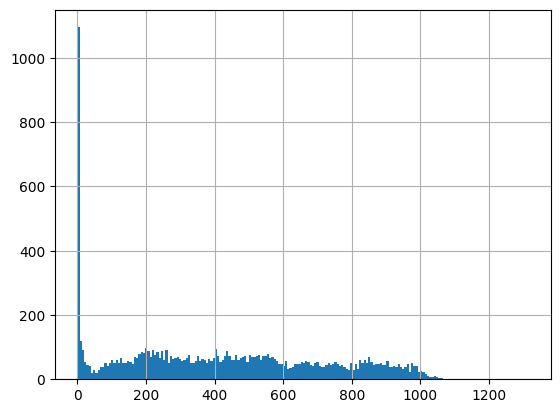

In [59]:
genout_ngo['kg_co2_per_mwh'].hist(bins=200)

In [60]:
genout_lci = genout.groupby('ba_code')['kg_co2_per_mwh'].mean()
genout_lci = genout_lci.reset_index()
genout_lci.head()

,ba_code,kg_co2_per_mwh
0,AEC,603.493532
1,AECI,764.692685
2,AVA,80.588272
3,AVRN,0.000000
4,AZPS,794.766192


In [61]:
low_ci_bas = genout_lci[genout_lci.kg_co2_per_mwh < 0]['ba_code'].to_list()
low_ci_bas

[]

In [62]:
genout_nlci = genout[~genout.ba_code.isin(low_ci_bas)]

<Axes: >

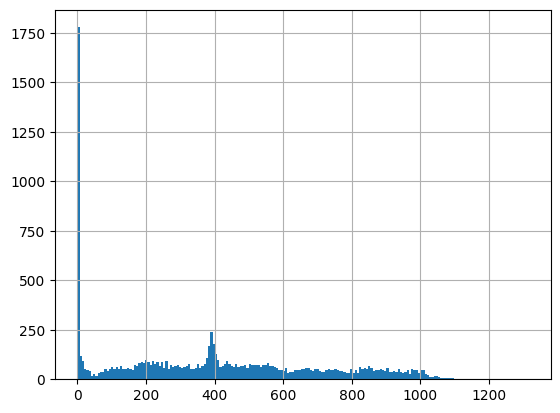

In [63]:
genout_nlci['kg_co2_per_mwh'].hist(bins=200)

In [64]:
genout.describe()

,period,gen_mwh,co2_kton,kg_co2_per_mwh
count,11147,1.114700e+04,11147.000000,11147.000000
mean,2015-07-28 02:46:38.744056576,1.030357e+07,4679.865621,404.767272
min,2008-01-01 00:00:00,8.658000e+01,0.000000,0.000000
25%,2011-11-01 00:00:00,7.849503e+05,125.297947,138.789241
50%,2015-08-01 00:00:00,2.118619e+06,1185.059897,388.123789
75%,2019-05-01 00:00:00,7.760802e+06,3407.406224,636.943651
max,2023-01-01 00:00:00,1.668256e+08,99993.229917,1314.265650
std,NaN,2.357447e+07,12279.365998,309.142402


array([[<Axes: title={'center': 'period'}>,
        <Axes: title={'center': 'gen_mwh'}>],
       [<Axes: title={'center': 'co2_kton'}>,
        <Axes: title={'center': 'kg_co2_per_mwh'}>]], dtype=object)

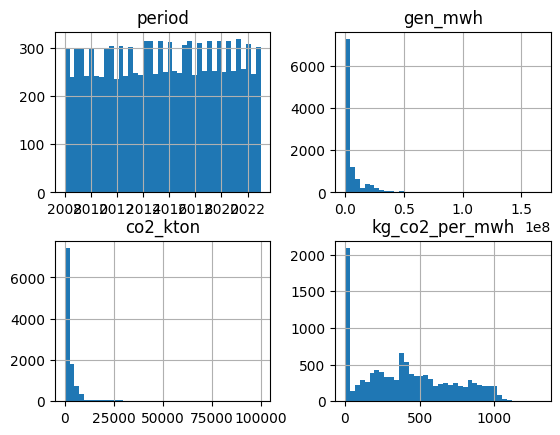

In [65]:
genout.hist(bins=40)

<Axes: >

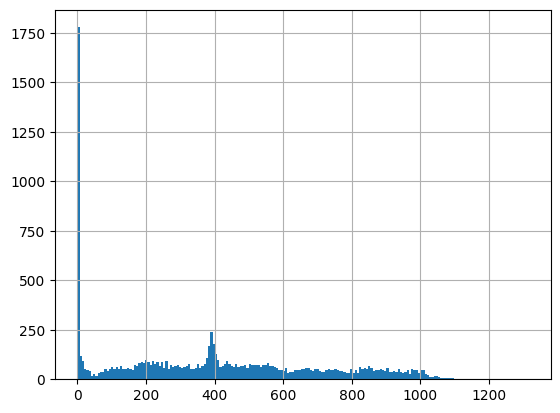

In [66]:
genout[genout.ba_code != 'NSB']['kg_co2_per_mwh'].hist(bins=200)

In [67]:
genout = genout_nlci.copy()

In [68]:
# save genout to csv
genout_fname = 'genout.csv'
with open(genout_fname, 'w') as outfile:
    genout.to_csv(outfile)